In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/bigmart/bigmart.csv')
df['Outlet_Size'] = df['Outlet_Size'].fillna('')

                                             |          | [  0%]   00:00 -> (? left)


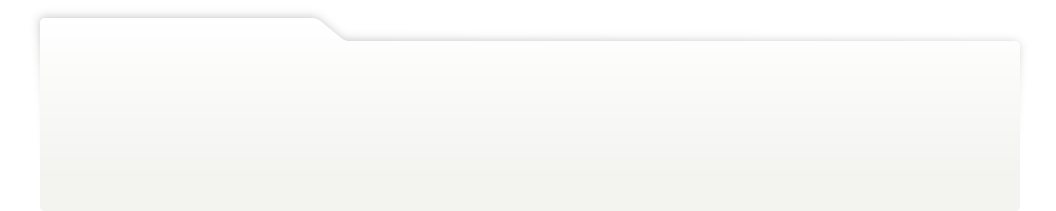
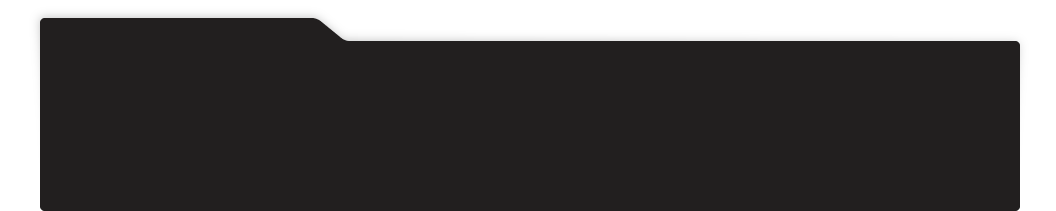
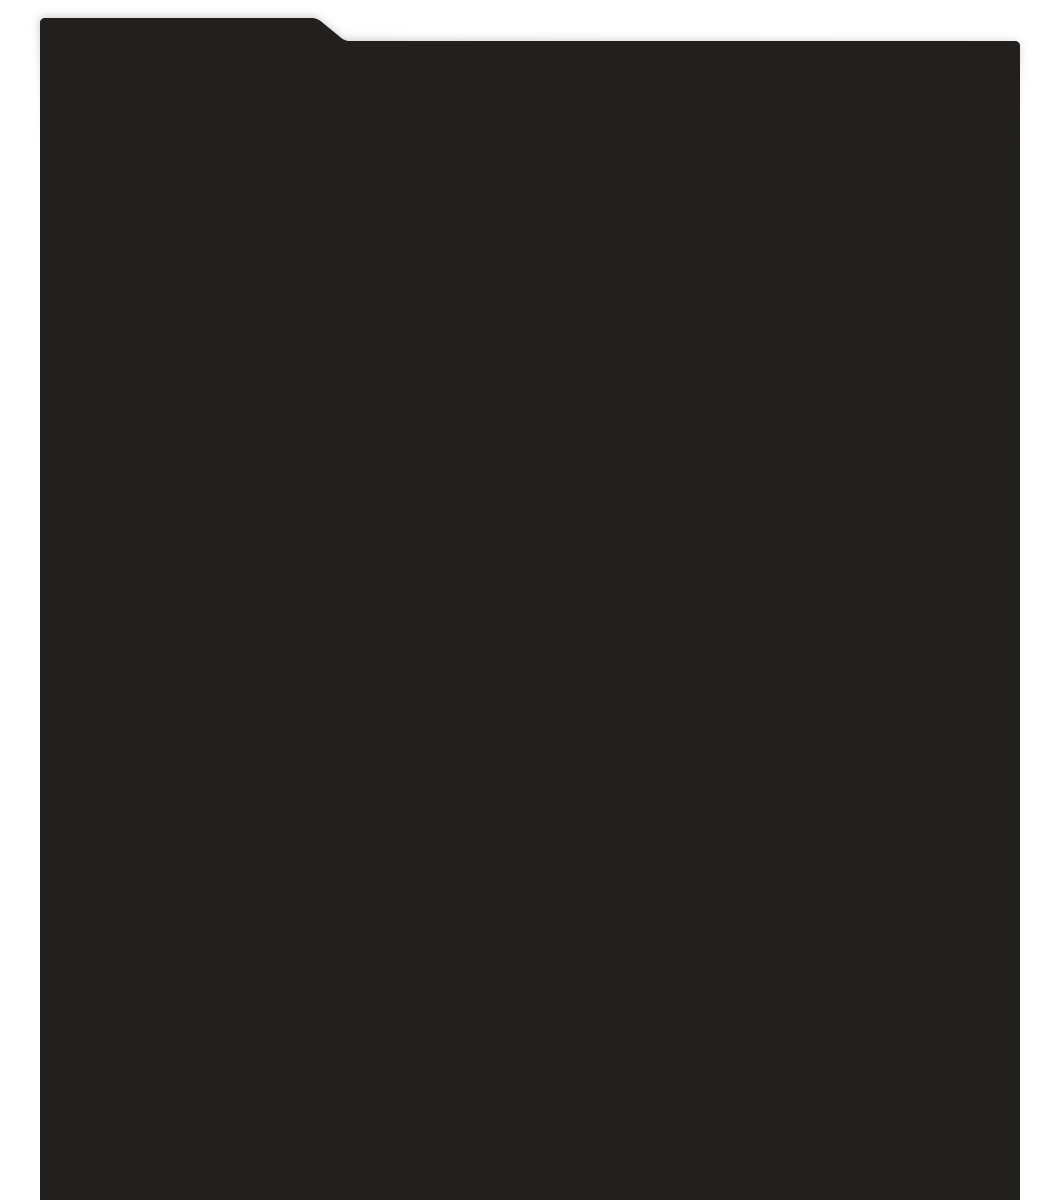
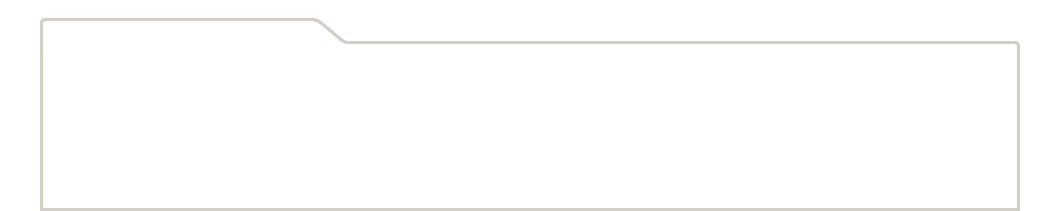
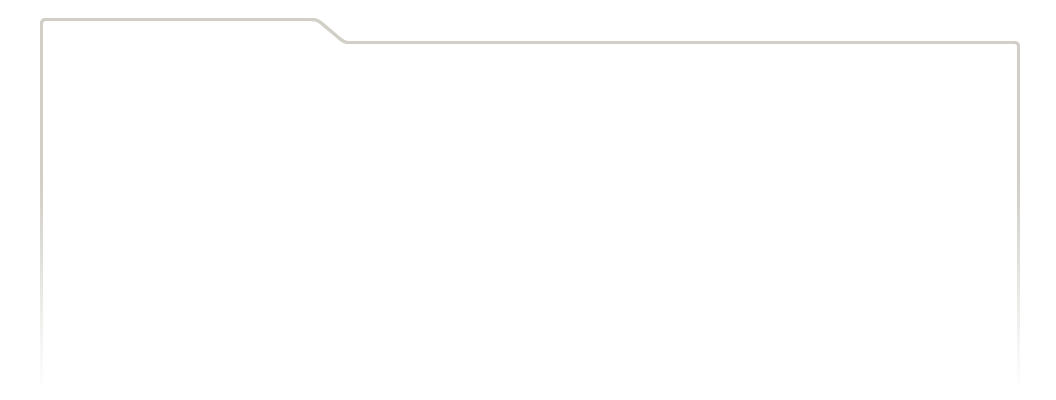
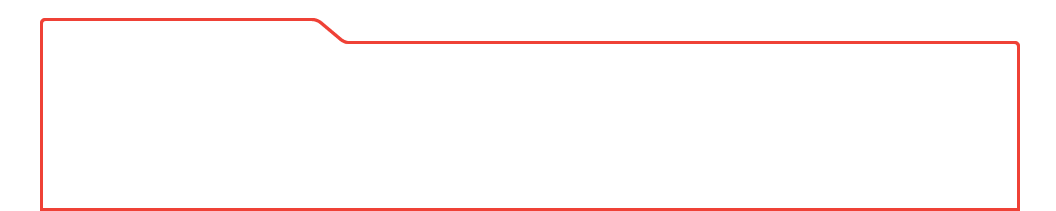
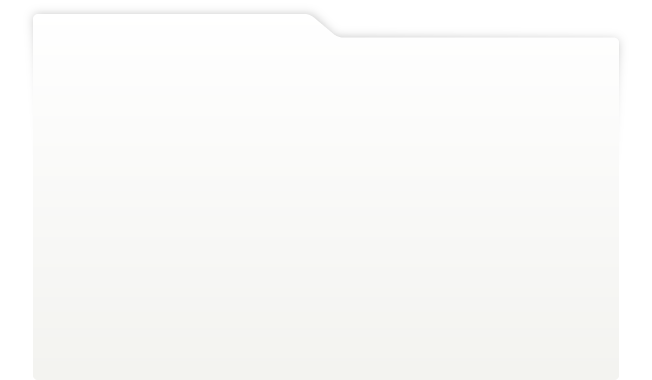
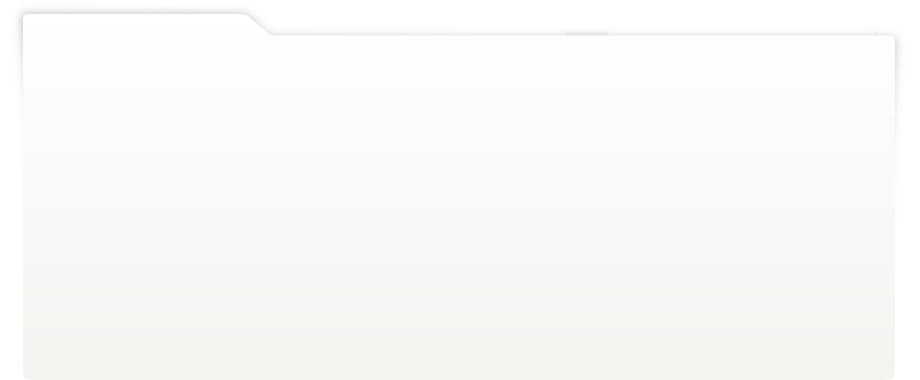
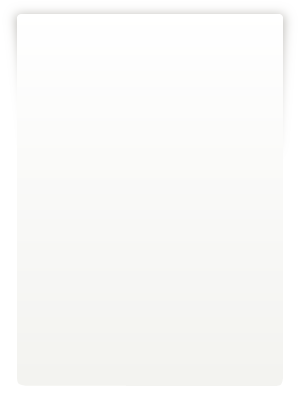
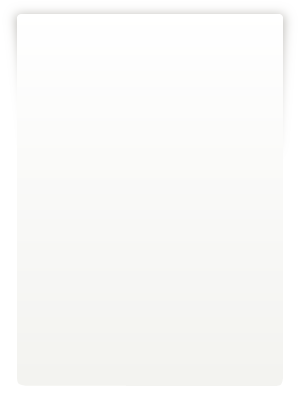
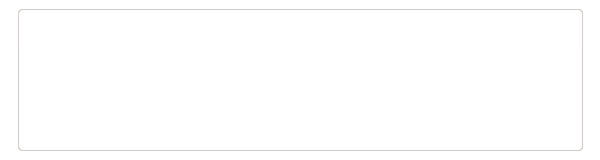
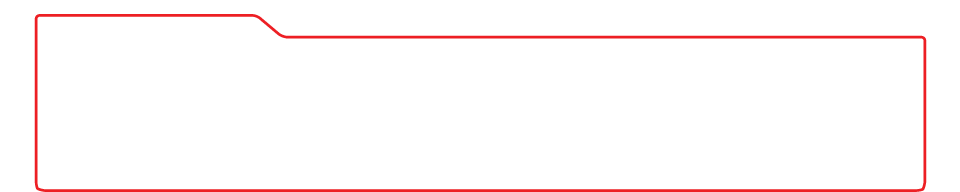
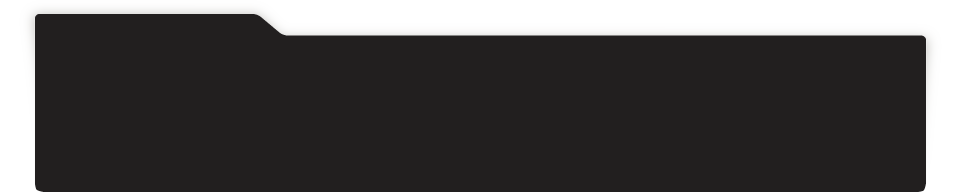
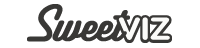
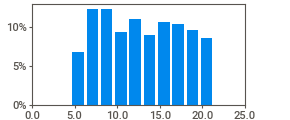
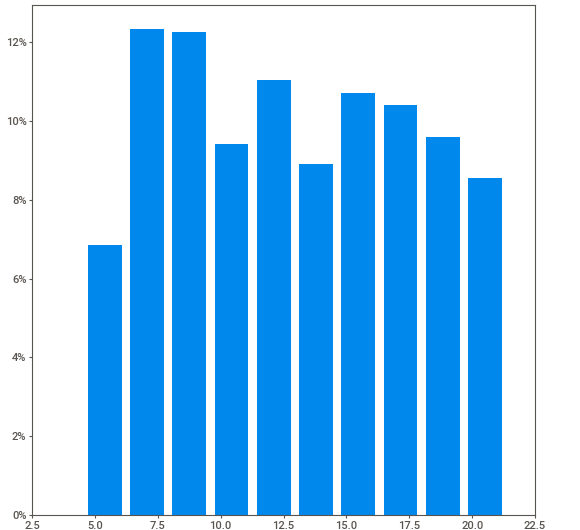
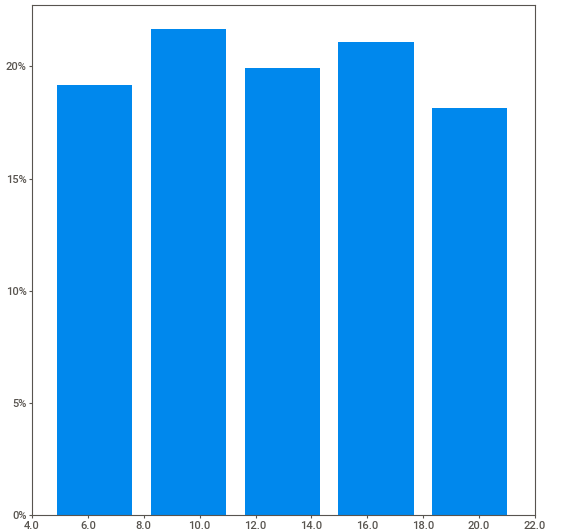
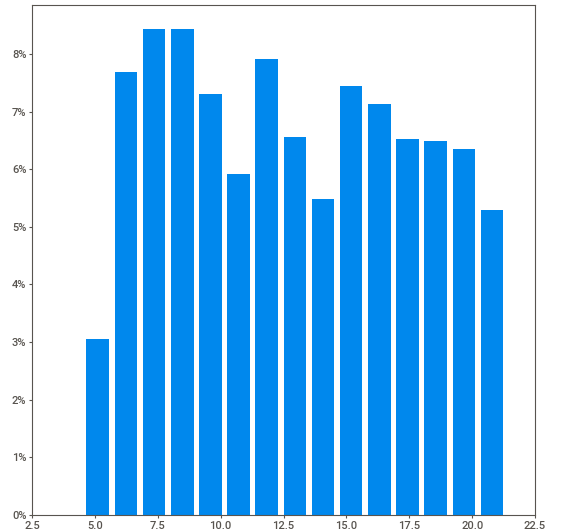
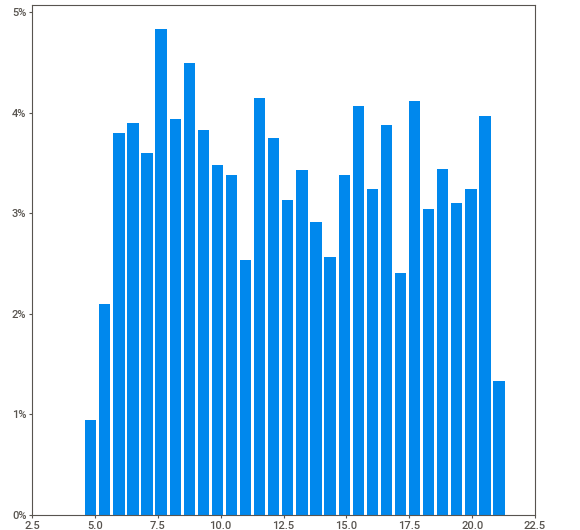
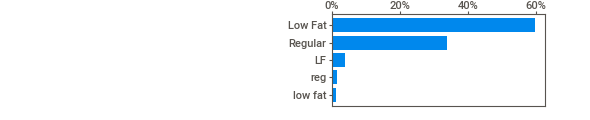
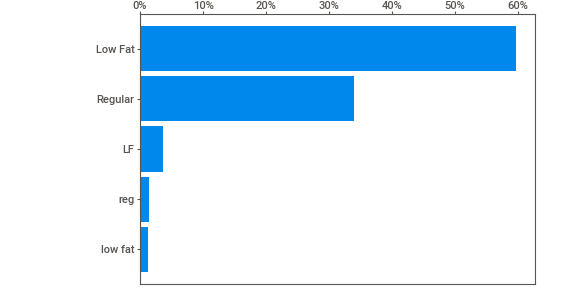
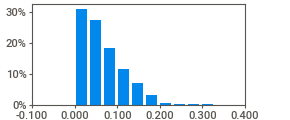
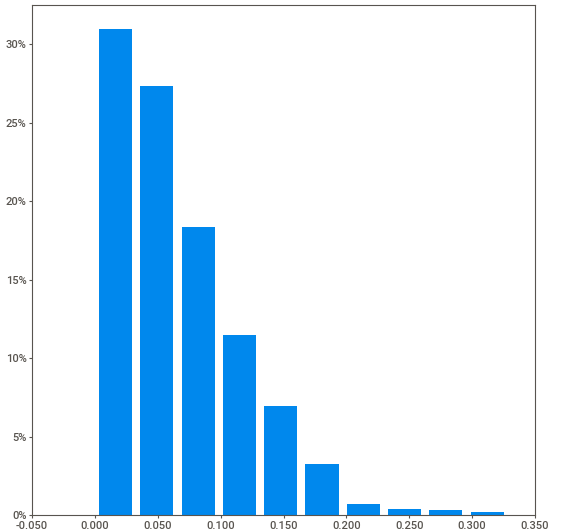
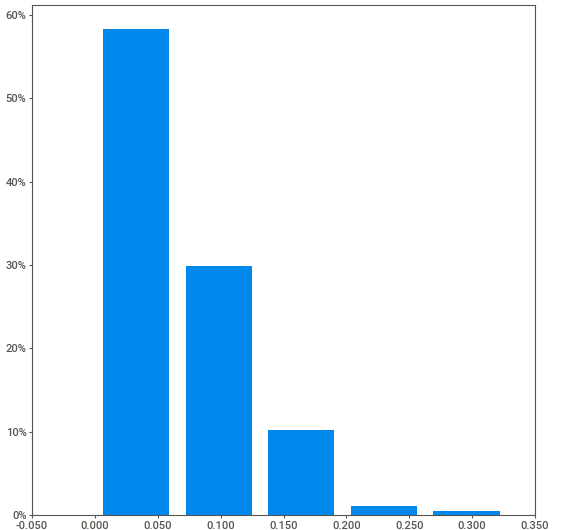
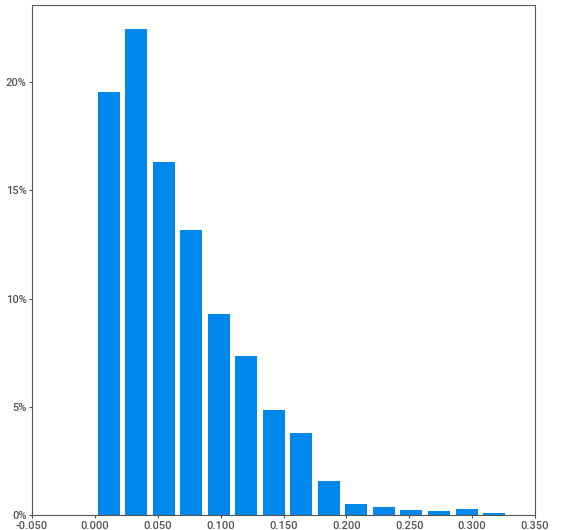
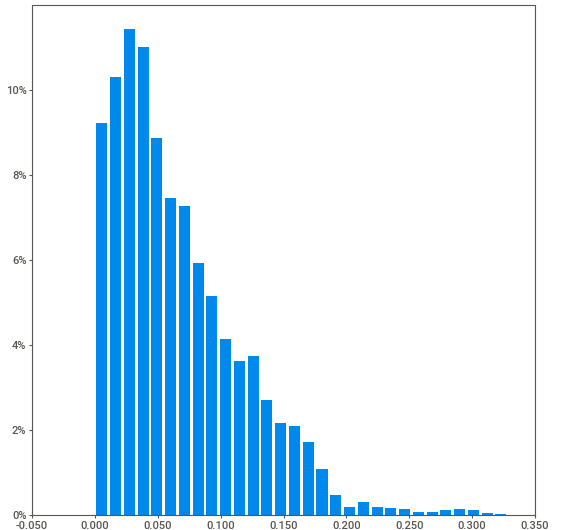
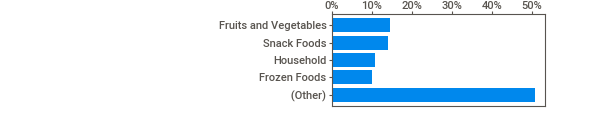
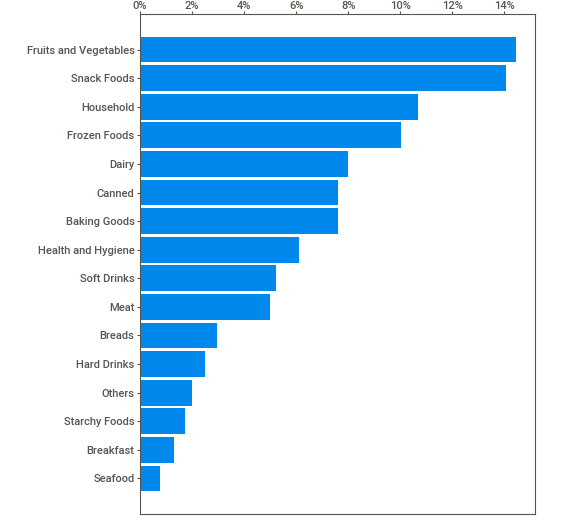
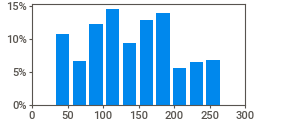
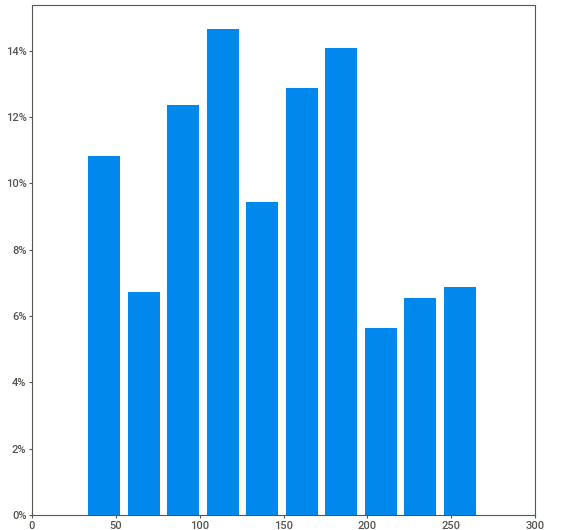
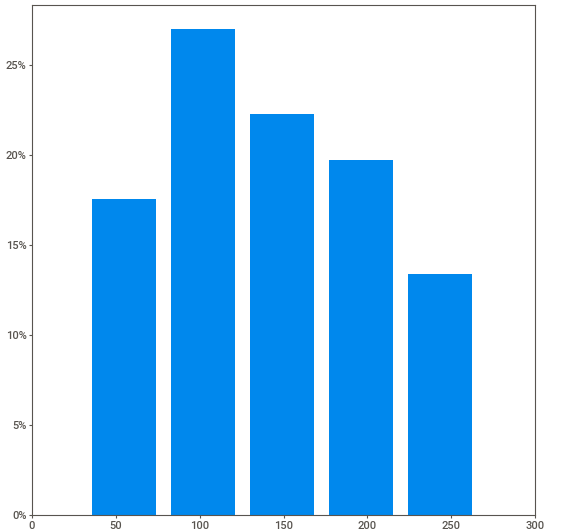
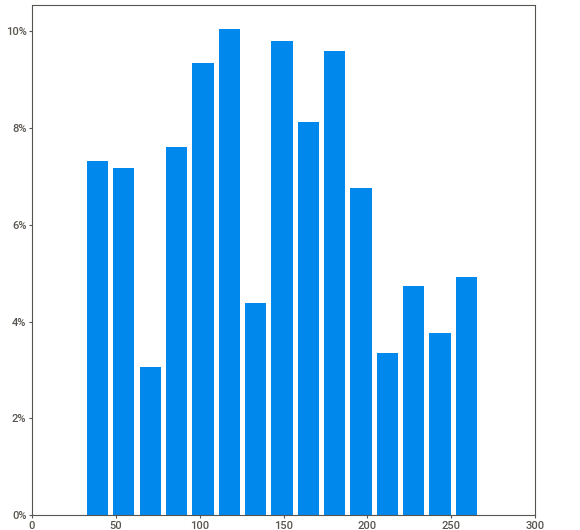
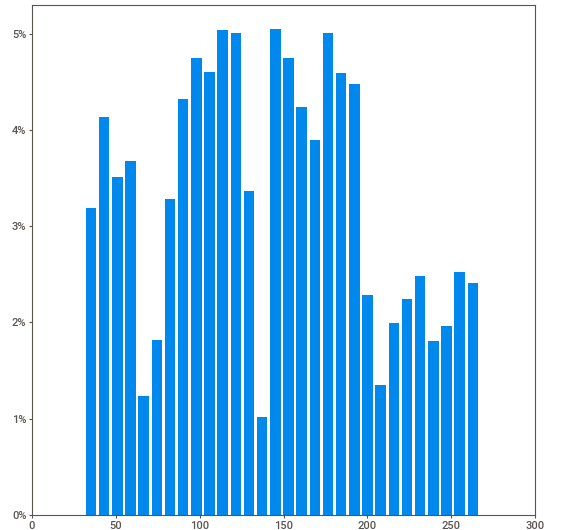
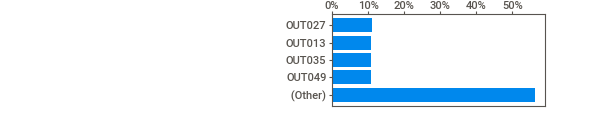
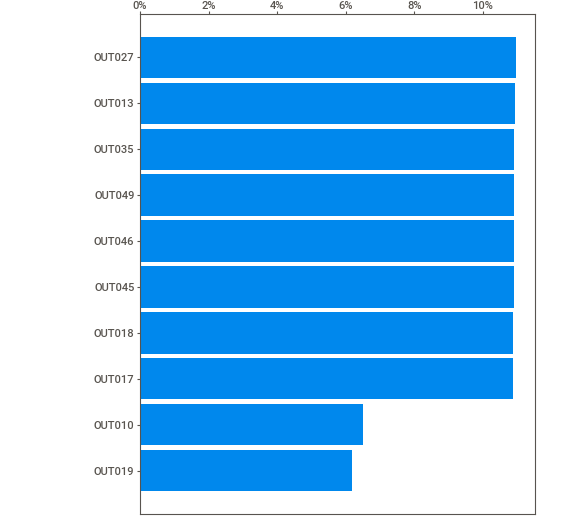
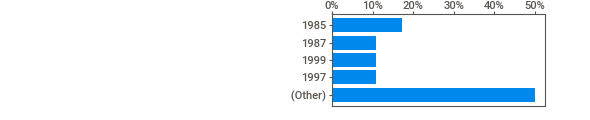
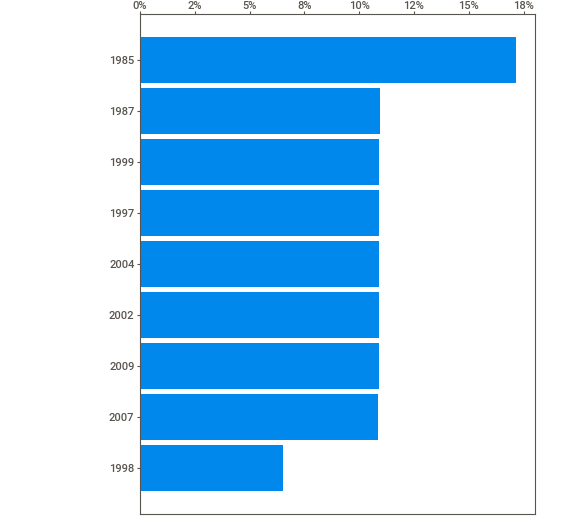
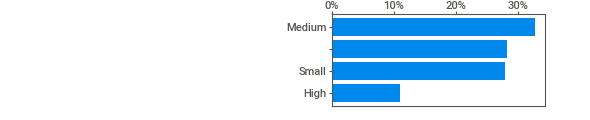
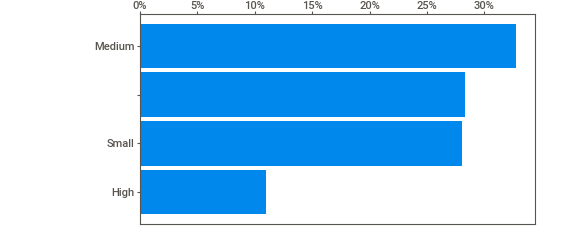
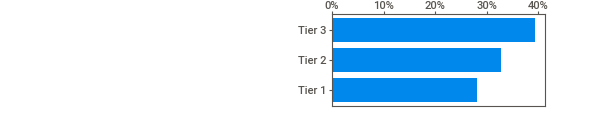
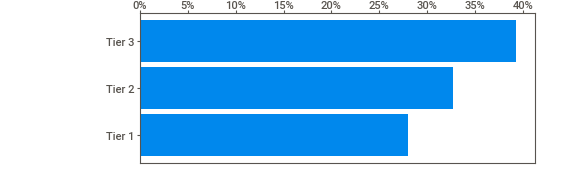
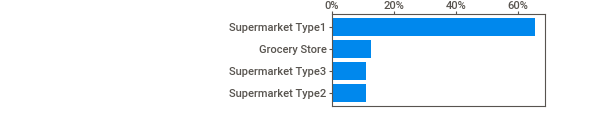
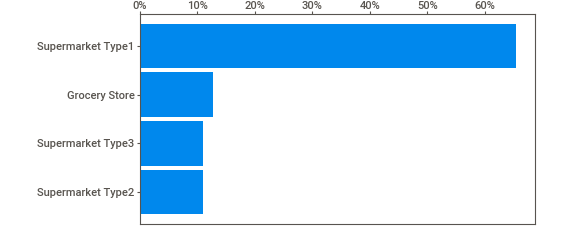
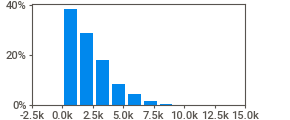
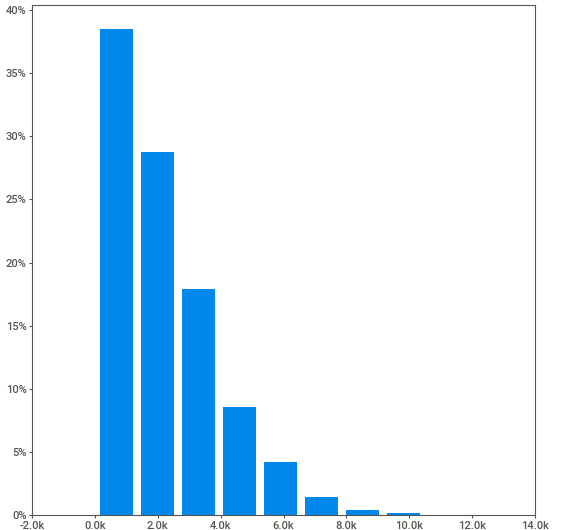
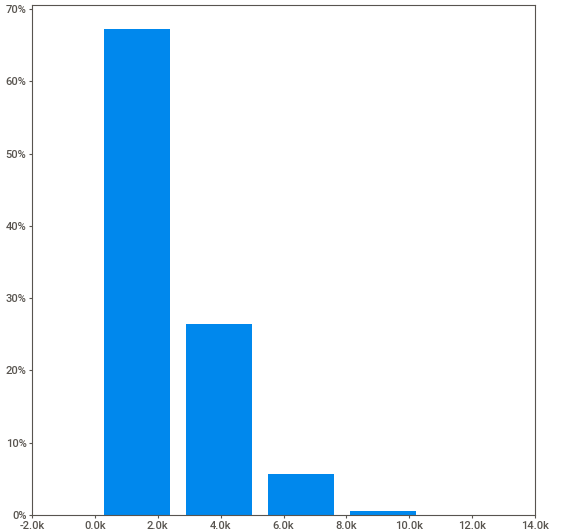
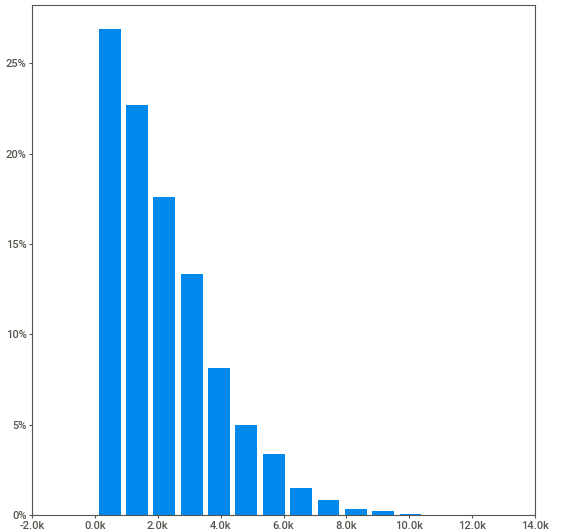
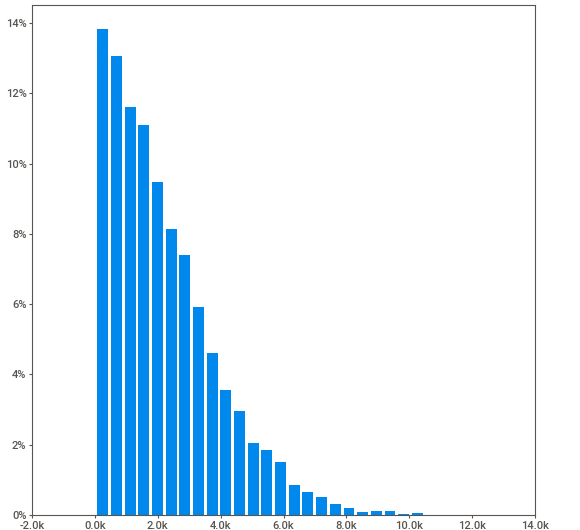
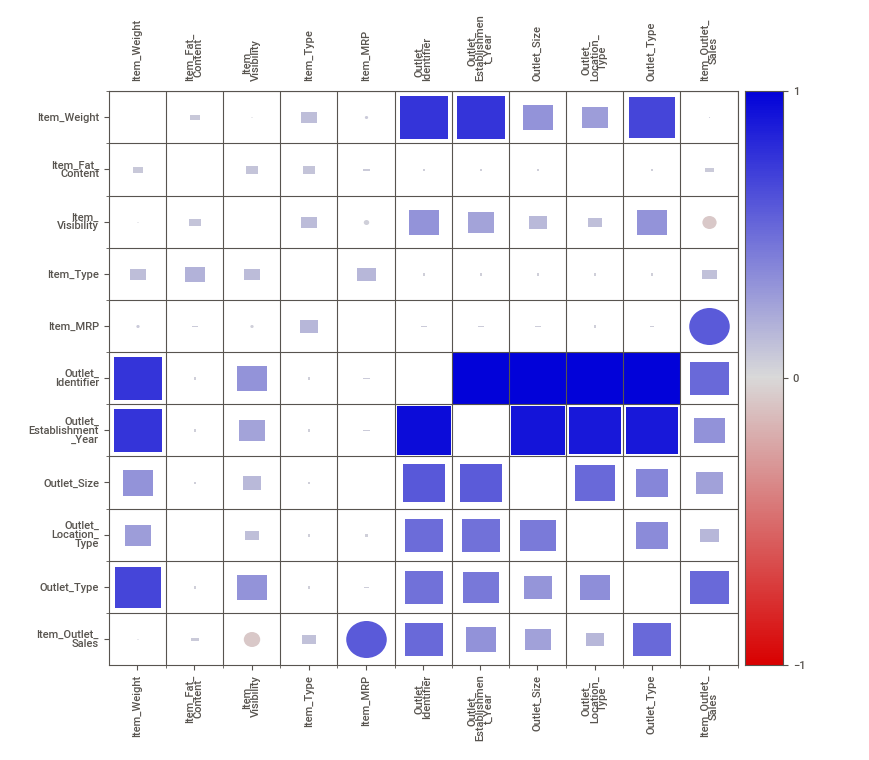
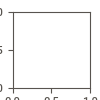

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])
y = np.log10(df[['Item_Outlet_Sales']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((6818, 10), (1705, 10))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000
)

In [8]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5435164	test: 0.5349423	best: 0.5349423 (0)	total: 55.8ms	remaining: 1m 51s
1:	learn: 0.5055537	test: 0.4985482	best: 0.4985482 (1)	total: 59ms	remaining: 59s
2:	learn: 0.4775579	test: 0.4719036	best: 0.4719036 (2)	total: 62.2ms	remaining: 41.4s
3:	learn: 0.4542759	test: 0.4494977	best: 0.4494977 (3)	total: 65.2ms	remaining: 32.5s
4:	learn: 0.4326994	test: 0.4289609	best: 0.4289609 (4)	total: 68.5ms	remaining: 27.3s
5:	learn: 0.4134208	test: 0.4103416	best: 0.4103416 (5)	total: 71.6ms	remaining: 23.8s
6:	learn: 0.3968167	test: 0.3939133	best: 0.3939133 (6)	total: 74.8ms	remaining: 21.3s
7:	learn: 0.3815002	test: 0.3791164	best: 0.3791164 (7)	total: 77.5ms	remaining: 19.3s
8:	learn: 0.3655146	test: 0.3637299	best: 0.3637299 (8)	total: 80.4ms	remaining: 17.8s
9:	learn: 0.3505416	test: 0.3493299	best: 0.3493299 (9)	total: 83.3ms	remaining: 16.6s
10:	learn: 0.3368841	test: 0.3364324	best: 0.3364324 (10)	total: 86.5ms	remaining: 15.6s
11:	learn: 0.3228656	test: 0.3228572	best: 0

152:	learn: -0.0764011	test: -0.0446162	best: -0.0446162 (152)	total: 450ms	remaining: 5.43s
153:	learn: -0.0771882	test: -0.0452102	best: -0.0452102 (153)	total: 453ms	remaining: 5.43s
154:	learn: -0.0775741	test: -0.0452068	best: -0.0452102 (153)	total: 456ms	remaining: 5.43s
155:	learn: -0.0785692	test: -0.0457874	best: -0.0457874 (155)	total: 459ms	remaining: 5.43s
156:	learn: -0.0793321	test: -0.0462447	best: -0.0462447 (156)	total: 462ms	remaining: 5.42s
157:	learn: -0.0795046	test: -0.0461953	best: -0.0462447 (156)	total: 465ms	remaining: 5.42s
158:	learn: -0.0810136	test: -0.0472740	best: -0.0472740 (158)	total: 469ms	remaining: 5.42s
159:	learn: -0.0812864	test: -0.0473630	best: -0.0473630 (159)	total: 472ms	remaining: 5.43s
160:	learn: -0.0820974	test: -0.0476634	best: -0.0476634 (160)	total: 474ms	remaining: 5.42s
161:	learn: -0.0821118	test: -0.0476399	best: -0.0476634 (160)	total: 475ms	remaining: 5.39s
162:	learn: -0.0823708	test: -0.0478857	best: -0.0478857 (162)	total: 

288:	learn: -0.1293442	test: -0.0529116	best: -0.0538355 (247)	total: 847ms	remaining: 5.01s
289:	learn: -0.1296164	test: -0.0525150	best: -0.0538355 (247)	total: 850ms	remaining: 5.01s
290:	learn: -0.1299376	test: -0.0525927	best: -0.0538355 (247)	total: 854ms	remaining: 5.01s
291:	learn: -0.1305444	test: -0.0529537	best: -0.0538355 (247)	total: 857ms	remaining: 5.01s
292:	learn: -0.1309774	test: -0.0532432	best: -0.0538355 (247)	total: 860ms	remaining: 5.01s
293:	learn: -0.1312344	test: -0.0532189	best: -0.0538355 (247)	total: 863ms	remaining: 5.01s
294:	learn: -0.1313400	test: -0.0532486	best: -0.0538355 (247)	total: 864ms	remaining: 4.99s
295:	learn: -0.1324958	test: -0.0531326	best: -0.0538355 (247)	total: 867ms	remaining: 4.99s
296:	learn: -0.1326402	test: -0.0531334	best: -0.0538355 (247)	total: 871ms	remaining: 4.99s
297:	learn: -0.1327762	test: -0.0531402	best: -0.0538355 (247)	total: 874ms	remaining: 4.99s
298:	learn: -0.1338746	test: -0.0528965	best: -0.0538355 (247)	total: 

413:	learn: -0.1736314	test: -0.0436364	best: -0.0538355 (247)	total: 1.25s	remaining: 4.78s
414:	learn: -0.1738806	test: -0.0434962	best: -0.0538355 (247)	total: 1.25s	remaining: 4.77s
415:	learn: -0.1741880	test: -0.0434183	best: -0.0538355 (247)	total: 1.25s	remaining: 4.77s
416:	learn: -0.1744483	test: -0.0435720	best: -0.0538355 (247)	total: 1.26s	remaining: 4.77s
417:	learn: -0.1746594	test: -0.0435673	best: -0.0538355 (247)	total: 1.26s	remaining: 4.76s
418:	learn: -0.1750361	test: -0.0431068	best: -0.0538355 (247)	total: 1.26s	remaining: 4.76s
419:	learn: -0.1753585	test: -0.0429441	best: -0.0538355 (247)	total: 1.26s	remaining: 4.76s
420:	learn: -0.1755360	test: -0.0428612	best: -0.0538355 (247)	total: 1.27s	remaining: 4.76s
421:	learn: -0.1758636	test: -0.0428200	best: -0.0538355 (247)	total: 1.27s	remaining: 4.75s
422:	learn: -0.1760083	test: -0.0426416	best: -0.0538355 (247)	total: 1.27s	remaining: 4.76s
423:	learn: -0.1763152	test: -0.0425094	best: -0.0538355 (247)	total: 

535:	learn: -0.2109695	test: -0.0284595	best: -0.0538355 (247)	total: 1.64s	remaining: 4.49s
536:	learn: -0.2112184	test: -0.0283653	best: -0.0538355 (247)	total: 1.65s	remaining: 4.49s
537:	learn: -0.2113844	test: -0.0280564	best: -0.0538355 (247)	total: 1.65s	remaining: 4.48s
538:	learn: -0.2114989	test: -0.0279939	best: -0.0538355 (247)	total: 1.65s	remaining: 4.48s
539:	learn: -0.2117285	test: -0.0277967	best: -0.0538355 (247)	total: 1.66s	remaining: 4.48s
540:	learn: -0.2120959	test: -0.0277952	best: -0.0538355 (247)	total: 1.66s	remaining: 4.48s
541:	learn: -0.2125994	test: -0.0277961	best: -0.0538355 (247)	total: 1.66s	remaining: 4.48s
542:	learn: -0.2130768	test: -0.0273577	best: -0.0538355 (247)	total: 1.67s	remaining: 4.48s
543:	learn: -0.2134337	test: -0.0275366	best: -0.0538355 (247)	total: 1.67s	remaining: 4.48s
544:	learn: -0.2141499	test: -0.0270978	best: -0.0538355 (247)	total: 1.68s	remaining: 4.48s
545:	learn: -0.2143129	test: -0.0269680	best: -0.0538355 (247)	total: 

653:	learn: -0.2438589	test: -0.0102975	best: -0.0538355 (247)	total: 2.04s	remaining: 4.2s
654:	learn: -0.2441161	test: -0.0101999	best: -0.0538355 (247)	total: 2.04s	remaining: 4.2s
655:	learn: -0.2444271	test: -0.0101858	best: -0.0538355 (247)	total: 2.05s	remaining: 4.2s
656:	learn: -0.2445745	test: -0.0101140	best: -0.0538355 (247)	total: 2.05s	remaining: 4.19s
657:	learn: -0.2449878	test: -0.0096114	best: -0.0538355 (247)	total: 2.05s	remaining: 4.19s
658:	learn: -0.2452429	test: -0.0094454	best: -0.0538355 (247)	total: 2.06s	remaining: 4.19s
659:	learn: -0.2455299	test: -0.0093317	best: -0.0538355 (247)	total: 2.06s	remaining: 4.18s
660:	learn: -0.2455925	test: -0.0089728	best: -0.0538355 (247)	total: 2.06s	remaining: 4.18s
661:	learn: -0.2457073	test: -0.0088187	best: -0.0538355 (247)	total: 2.07s	remaining: 4.18s
662:	learn: -0.2458799	test: -0.0088854	best: -0.0538355 (247)	total: 2.07s	remaining: 4.17s
663:	learn: -0.2461934	test: -0.0090201	best: -0.0538355 (247)	total: 2.0

778:	learn: -0.2732791	test: 0.0085807	best: -0.0538355 (247)	total: 2.44s	remaining: 3.83s
779:	learn: -0.2734516	test: 0.0087141	best: -0.0538355 (247)	total: 2.44s	remaining: 3.82s
780:	learn: -0.2736074	test: 0.0090025	best: -0.0538355 (247)	total: 2.45s	remaining: 3.82s
781:	learn: -0.2738529	test: 0.0090787	best: -0.0538355 (247)	total: 2.45s	remaining: 3.82s
782:	learn: -0.2740531	test: 0.0090823	best: -0.0538355 (247)	total: 2.45s	remaining: 3.81s
783:	learn: -0.2741721	test: 0.0091682	best: -0.0538355 (247)	total: 2.46s	remaining: 3.81s
784:	learn: -0.2743634	test: 0.0093136	best: -0.0538355 (247)	total: 2.46s	remaining: 3.81s
785:	learn: -0.2744612	test: 0.0093382	best: -0.0538355 (247)	total: 2.46s	remaining: 3.8s
786:	learn: -0.2746125	test: 0.0094260	best: -0.0538355 (247)	total: 2.46s	remaining: 3.8s
787:	learn: -0.2748309	test: 0.0094838	best: -0.0538355 (247)	total: 2.47s	remaining: 3.8s
788:	learn: -0.2751012	test: 0.0095931	best: -0.0538355 (247)	total: 2.47s	remainin

903:	learn: -0.2987885	test: 0.0266169	best: -0.0538355 (247)	total: 2.84s	remaining: 3.44s
904:	learn: -0.2989823	test: 0.0269773	best: -0.0538355 (247)	total: 2.85s	remaining: 3.44s
905:	learn: -0.2992372	test: 0.0271150	best: -0.0538355 (247)	total: 2.85s	remaining: 3.44s
906:	learn: -0.2994575	test: 0.0274827	best: -0.0538355 (247)	total: 2.85s	remaining: 3.44s
907:	learn: -0.2996070	test: 0.0272609	best: -0.0538355 (247)	total: 2.85s	remaining: 3.43s
908:	learn: -0.2997936	test: 0.0271867	best: -0.0538355 (247)	total: 2.86s	remaining: 3.43s
909:	learn: -0.2999805	test: 0.0272540	best: -0.0538355 (247)	total: 2.86s	remaining: 3.42s
910:	learn: -0.3001278	test: 0.0275441	best: -0.0538355 (247)	total: 2.86s	remaining: 3.42s
911:	learn: -0.3002838	test: 0.0277119	best: -0.0538355 (247)	total: 2.87s	remaining: 3.42s
912:	learn: -0.3003826	test: 0.0278530	best: -0.0538355 (247)	total: 2.87s	remaining: 3.42s
913:	learn: -0.3005683	test: 0.0280793	best: -0.0538355 (247)	total: 2.87s	remai

1027:	learn: -0.3208326	test: 0.0512751	best: -0.0538355 (247)	total: 3.24s	remaining: 3.06s
1028:	learn: -0.3209190	test: 0.0515013	best: -0.0538355 (247)	total: 3.24s	remaining: 3.06s
1029:	learn: -0.3210671	test: 0.0516173	best: -0.0538355 (247)	total: 3.25s	remaining: 3.06s
1030:	learn: -0.3213188	test: 0.0519499	best: -0.0538355 (247)	total: 3.25s	remaining: 3.05s
1031:	learn: -0.3215242	test: 0.0527425	best: -0.0538355 (247)	total: 3.25s	remaining: 3.05s
1032:	learn: -0.3216642	test: 0.0529234	best: -0.0538355 (247)	total: 3.26s	remaining: 3.05s
1033:	learn: -0.3218429	test: 0.0530282	best: -0.0538355 (247)	total: 3.26s	remaining: 3.04s
1034:	learn: -0.3220568	test: 0.0529787	best: -0.0538355 (247)	total: 3.26s	remaining: 3.04s
1035:	learn: -0.3221323	test: 0.0534894	best: -0.0538355 (247)	total: 3.27s	remaining: 3.04s
1036:	learn: -0.3223118	test: 0.0533857	best: -0.0538355 (247)	total: 3.27s	remaining: 3.04s
1037:	learn: -0.3224130	test: 0.0535420	best: -0.0538355 (247)	total: 

1141:	learn: -0.3386594	test: 0.0685802	best: -0.0538355 (247)	total: 3.65s	remaining: 2.75s
1142:	learn: -0.3388060	test: 0.0687066	best: -0.0538355 (247)	total: 3.67s	remaining: 2.75s
1143:	learn: -0.3389019	test: 0.0687297	best: -0.0538355 (247)	total: 3.68s	remaining: 2.75s
1144:	learn: -0.3390255	test: 0.0688847	best: -0.0538355 (247)	total: 3.69s	remaining: 2.75s
1145:	learn: -0.3391878	test: 0.0689268	best: -0.0538355 (247)	total: 3.69s	remaining: 2.75s
1146:	learn: -0.3392339	test: 0.0689821	best: -0.0538355 (247)	total: 3.69s	remaining: 2.75s
1147:	learn: -0.3393791	test: 0.0690909	best: -0.0538355 (247)	total: 3.7s	remaining: 2.75s
1148:	learn: -0.3394764	test: 0.0691648	best: -0.0538355 (247)	total: 3.7s	remaining: 2.74s
1149:	learn: -0.3396592	test: 0.0693917	best: -0.0538355 (247)	total: 3.71s	remaining: 2.74s
1150:	learn: -0.3397568	test: 0.0694964	best: -0.0538355 (247)	total: 3.71s	remaining: 2.74s
1151:	learn: -0.3398637	test: 0.0694746	best: -0.0538355 (247)	total: 3.

1246:	learn: -0.3545928	test: 0.0835169	best: -0.0538355 (247)	total: 4.06s	remaining: 2.45s
1247:	learn: -0.3547056	test: 0.0838290	best: -0.0538355 (247)	total: 4.06s	remaining: 2.45s
1248:	learn: -0.3549474	test: 0.0840108	best: -0.0538355 (247)	total: 4.06s	remaining: 2.44s
1249:	learn: -0.3551614	test: 0.0841350	best: -0.0538355 (247)	total: 4.07s	remaining: 2.44s
1250:	learn: -0.3552719	test: 0.0844606	best: -0.0538355 (247)	total: 4.07s	remaining: 2.44s
1251:	learn: -0.3554941	test: 0.0845654	best: -0.0538355 (247)	total: 4.08s	remaining: 2.43s
1252:	learn: -0.3556330	test: 0.0845366	best: -0.0538355 (247)	total: 4.08s	remaining: 2.43s
1253:	learn: -0.3556980	test: 0.0845988	best: -0.0538355 (247)	total: 4.08s	remaining: 2.43s
1254:	learn: -0.3558617	test: 0.0847525	best: -0.0538355 (247)	total: 4.08s	remaining: 2.42s
1255:	learn: -0.3560865	test: 0.0851833	best: -0.0538355 (247)	total: 4.09s	remaining: 2.42s
1256:	learn: -0.3562469	test: 0.0853698	best: -0.0538355 (247)	total: 

1369:	learn: -0.3720217	test: 0.1042846	best: -0.0538355 (247)	total: 4.45s	remaining: 2.05s
1370:	learn: -0.3721512	test: 0.1043655	best: -0.0538355 (247)	total: 4.46s	remaining: 2.04s
1371:	learn: -0.3722517	test: 0.1045224	best: -0.0538355 (247)	total: 4.46s	remaining: 2.04s
1372:	learn: -0.3723849	test: 0.1045355	best: -0.0538355 (247)	total: 4.46s	remaining: 2.04s
1373:	learn: -0.3724744	test: 0.1044146	best: -0.0538355 (247)	total: 4.46s	remaining: 2.03s
1374:	learn: -0.3726686	test: 0.1044950	best: -0.0538355 (247)	total: 4.47s	remaining: 2.03s
1375:	learn: -0.3727387	test: 0.1046385	best: -0.0538355 (247)	total: 4.47s	remaining: 2.03s
1376:	learn: -0.3728311	test: 0.1046600	best: -0.0538355 (247)	total: 4.47s	remaining: 2.02s
1377:	learn: -0.3731147	test: 0.1049198	best: -0.0538355 (247)	total: 4.48s	remaining: 2.02s
1378:	learn: -0.3732025	test: 0.1051690	best: -0.0538355 (247)	total: 4.48s	remaining: 2.02s
1379:	learn: -0.3735504	test: 0.1052688	best: -0.0538355 (247)	total: 

1497:	learn: -0.3884270	test: 0.1230289	best: -0.0538355 (247)	total: 4.85s	remaining: 1.63s
1498:	learn: -0.3885133	test: 0.1232258	best: -0.0538355 (247)	total: 4.85s	remaining: 1.62s
1499:	learn: -0.3885473	test: 0.1233315	best: -0.0538355 (247)	total: 4.86s	remaining: 1.62s
1500:	learn: -0.3886549	test: 0.1233582	best: -0.0538355 (247)	total: 4.86s	remaining: 1.61s
1501:	learn: -0.3887576	test: 0.1237815	best: -0.0538355 (247)	total: 4.86s	remaining: 1.61s
1502:	learn: -0.3888257	test: 0.1237212	best: -0.0538355 (247)	total: 4.87s	remaining: 1.61s
1503:	learn: -0.3889662	test: 0.1239316	best: -0.0538355 (247)	total: 4.87s	remaining: 1.6s
1504:	learn: -0.3891388	test: 0.1242335	best: -0.0538355 (247)	total: 4.87s	remaining: 1.6s
1505:	learn: -0.3892844	test: 0.1241059	best: -0.0538355 (247)	total: 4.87s	remaining: 1.6s
1506:	learn: -0.3894260	test: 0.1242044	best: -0.0538355 (247)	total: 4.88s	remaining: 1.59s
1507:	learn: -0.3895905	test: 0.1242928	best: -0.0538355 (247)	total: 4.8

1625:	learn: -0.4024297	test: 0.1399653	best: -0.0538355 (247)	total: 5.25s	remaining: 1.21s
1626:	learn: -0.4025358	test: 0.1402248	best: -0.0538355 (247)	total: 5.25s	remaining: 1.2s
1627:	learn: -0.4025858	test: 0.1402692	best: -0.0538355 (247)	total: 5.25s	remaining: 1.2s
1628:	learn: -0.4026055	test: 0.1403674	best: -0.0538355 (247)	total: 5.25s	remaining: 1.2s
1629:	learn: -0.4026663	test: 0.1404639	best: -0.0538355 (247)	total: 5.26s	remaining: 1.19s
1630:	learn: -0.4027780	test: 0.1406413	best: -0.0538355 (247)	total: 5.26s	remaining: 1.19s
1631:	learn: -0.4029326	test: 0.1409333	best: -0.0538355 (247)	total: 5.27s	remaining: 1.19s
1632:	learn: -0.4031292	test: 0.1410925	best: -0.0538355 (247)	total: 5.27s	remaining: 1.18s
1633:	learn: -0.4031785	test: 0.1411367	best: -0.0538355 (247)	total: 5.27s	remaining: 1.18s
1634:	learn: -0.4032444	test: 0.1412676	best: -0.0538355 (247)	total: 5.28s	remaining: 1.18s
1635:	learn: -0.4033878	test: 0.1412876	best: -0.0538355 (247)	total: 5.2

1752:	learn: -0.4163362	test: 0.1561300	best: -0.0538355 (247)	total: 5.64s	remaining: 794ms
1753:	learn: -0.4165007	test: 0.1565641	best: -0.0538355 (247)	total: 5.64s	remaining: 791ms
1754:	learn: -0.4165596	test: 0.1565652	best: -0.0538355 (247)	total: 5.64s	remaining: 788ms
1755:	learn: -0.4166506	test: 0.1567382	best: -0.0538355 (247)	total: 5.65s	remaining: 785ms
1756:	learn: -0.4166763	test: 0.1567993	best: -0.0538355 (247)	total: 5.65s	remaining: 782ms
1757:	learn: -0.4166876	test: 0.1568796	best: -0.0538355 (247)	total: 5.65s	remaining: 778ms
1758:	learn: -0.4166896	test: 0.1569552	best: -0.0538355 (247)	total: 5.66s	remaining: 775ms
1759:	learn: -0.4167296	test: 0.1570650	best: -0.0538355 (247)	total: 5.66s	remaining: 772ms
1760:	learn: -0.4168617	test: 0.1572759	best: -0.0538355 (247)	total: 5.66s	remaining: 769ms
1761:	learn: -0.4169471	test: 0.1572439	best: -0.0538355 (247)	total: 5.67s	remaining: 765ms
1762:	learn: -0.4171191	test: 0.1572482	best: -0.0538355 (247)	total: 

1884:	learn: -0.4275488	test: 0.1691112	best: -0.0538355 (247)	total: 6.04s	remaining: 368ms
1885:	learn: -0.4275899	test: 0.1691425	best: -0.0538355 (247)	total: 6.04s	remaining: 365ms
1886:	learn: -0.4276775	test: 0.1694377	best: -0.0538355 (247)	total: 6.04s	remaining: 362ms
1887:	learn: -0.4277454	test: 0.1694577	best: -0.0538355 (247)	total: 6.04s	remaining: 359ms
1888:	learn: -0.4278688	test: 0.1697726	best: -0.0538355 (247)	total: 6.05s	remaining: 355ms
1889:	learn: -0.4278872	test: 0.1698243	best: -0.0538355 (247)	total: 6.05s	remaining: 352ms
1890:	learn: -0.4279703	test: 0.1699724	best: -0.0538355 (247)	total: 6.05s	remaining: 349ms
1891:	learn: -0.4280478	test: 0.1699282	best: -0.0538355 (247)	total: 6.06s	remaining: 346ms
1892:	learn: -0.4281092	test: 0.1700682	best: -0.0538355 (247)	total: 6.06s	remaining: 343ms
1893:	learn: -0.4281732	test: 0.1703324	best: -0.0538355 (247)	total: 6.06s	remaining: 339ms
1894:	learn: -0.4281841	test: 0.1703710	best: -0.0538355 (247)	total: 

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
calculate_nll_catboost(model, x_train, y_train)

-0.0868682818542164

In [11]:
calculate_nll_catboost(model, x_test, y_test)

-0.058577021300944825

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[1, 3, 5, 7, 8, 9], 
    loss_function="RMSEWithUncertainty",
    depth=2,
    num_trees=500,
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 200, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=50, batch_size=1024, verbose=True)

0:	learn: 0.5511880	total: 2.68ms	remaining: 1.34s
1:	learn: 0.5175165	total: 4.21ms	remaining: 1.05s
2:	learn: 0.4926270	total: 5.3ms	remaining: 878ms
3:	learn: 0.4722060	total: 6.83ms	remaining: 846ms
4:	learn: 0.4540850	total: 7.91ms	remaining: 783ms
5:	learn: 0.4386631	total: 8.99ms	remaining: 740ms
6:	learn: 0.4239072	total: 10ms	remaining: 705ms
7:	learn: 0.4107577	total: 11ms	remaining: 679ms
8:	learn: 0.3985946	total: 12ms	remaining: 657ms
9:	learn: 0.3873925	total: 13.1ms	remaining: 640ms
10:	learn: 0.3772069	total: 14.1ms	remaining: 626ms
11:	learn: 0.3652557	total: 15.1ms	remaining: 613ms
12:	learn: 0.3538125	total: 16.1ms	remaining: 605ms
13:	learn: 0.3425602	total: 17.2ms	remaining: 597ms
14:	learn: 0.3346287	total: 18.2ms	remaining: 590ms
15:	learn: 0.3239578	total: 19.5ms	remaining: 589ms
16:	learn: 0.3148713	total: 20.5ms	remaining: 584ms
17:	learn: 0.3077560	total: 21.6ms	remaining: 577ms
18:	learn: 0.3016945	total: 22.6ms	remaining: 572ms
19:	learn: 0.2945787	total: 2

306:	learn: -0.0734476	total: 394ms	remaining: 248ms
307:	learn: -0.0739492	total: 395ms	remaining: 246ms
308:	learn: -0.0739954	total: 397ms	remaining: 245ms
309:	learn: -0.0740545	total: 398ms	remaining: 244ms
310:	learn: -0.0742081	total: 399ms	remaining: 243ms
311:	learn: -0.0744439	total: 401ms	remaining: 241ms
312:	learn: -0.0745780	total: 402ms	remaining: 240ms
313:	learn: -0.0748298	total: 404ms	remaining: 239ms
314:	learn: -0.0748331	total: 405ms	remaining: 238ms
315:	learn: -0.0749476	total: 406ms	remaining: 236ms
316:	learn: -0.0750710	total: 408ms	remaining: 235ms
317:	learn: -0.0751006	total: 409ms	remaining: 234ms
318:	learn: -0.0754020	total: 410ms	remaining: 233ms
319:	learn: -0.0754779	total: 412ms	remaining: 231ms
320:	learn: -0.0759510	total: 413ms	remaining: 230ms
321:	learn: -0.0764343	total: 414ms	remaining: 229ms
322:	learn: -0.0764500	total: 415ms	remaining: 228ms
323:	learn: -0.0764514	total: 416ms	remaining: 226ms
324:	learn: -0.0766416	total: 417ms	remaining:

467:	learn: -0.0920884	total: 589ms	remaining: 40.2ms
468:	learn: -0.0921189	total: 590ms	remaining: 39ms
469:	learn: -0.0921485	total: 591ms	remaining: 37.7ms
470:	learn: -0.0921519	total: 592ms	remaining: 36.5ms
471:	learn: -0.0921532	total: 594ms	remaining: 35.2ms
472:	learn: -0.0922201	total: 595ms	remaining: 34ms
473:	learn: -0.0922597	total: 596ms	remaining: 32.7ms
474:	learn: -0.0923225	total: 597ms	remaining: 31.4ms
475:	learn: -0.0923469	total: 598ms	remaining: 30.2ms
476:	learn: -0.0923483	total: 599ms	remaining: 28.9ms
477:	learn: -0.0924106	total: 600ms	remaining: 27.6ms
478:	learn: -0.0925507	total: 602ms	remaining: 26.4ms
479:	learn: -0.0926411	total: 603ms	remaining: 25.1ms
480:	learn: -0.0926466	total: 604ms	remaining: 23.9ms
481:	learn: -0.0928077	total: 605ms	remaining: 22.6ms
482:	learn: -0.0929126	total: 606ms	remaining: 21.3ms
483:	learn: -0.0930598	total: 608ms	remaining: 20.1ms
484:	learn: -0.0930968	total: 609ms	remaining: 18.8ms
485:	learn: -0.0932654	total: 61

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7fa89deea748>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7fa89deea390>)

In [14]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-0.19051121

In [15]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-0.14238137

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

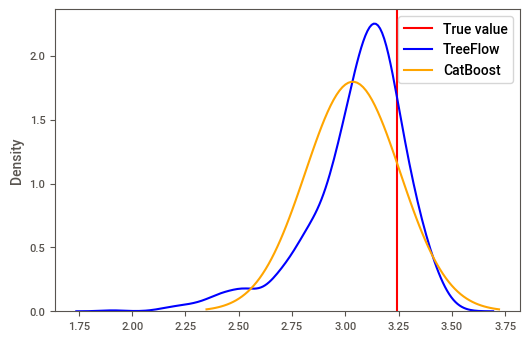

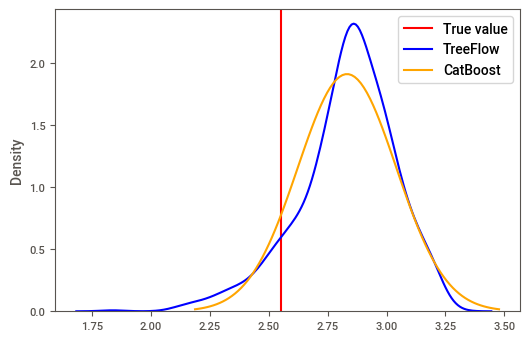

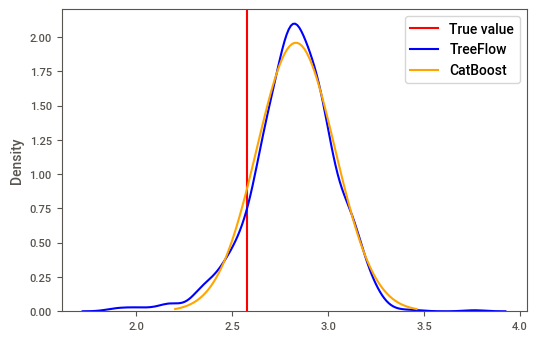

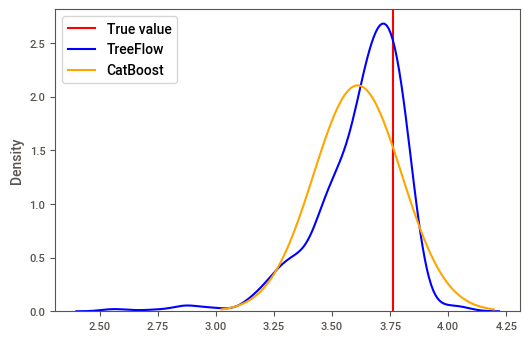

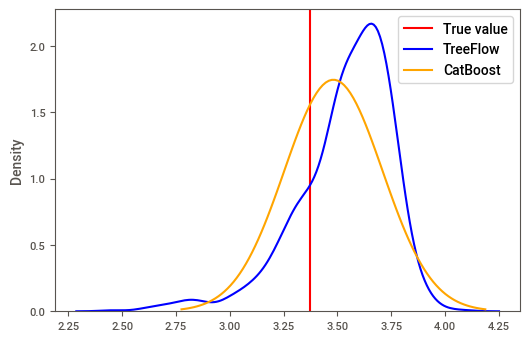

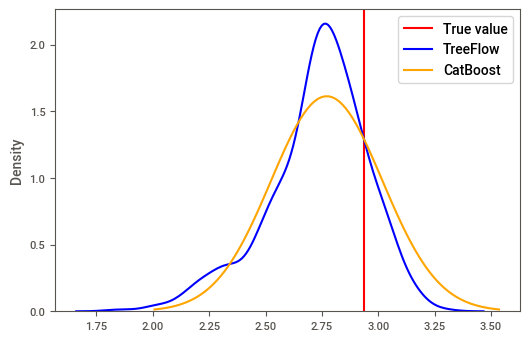

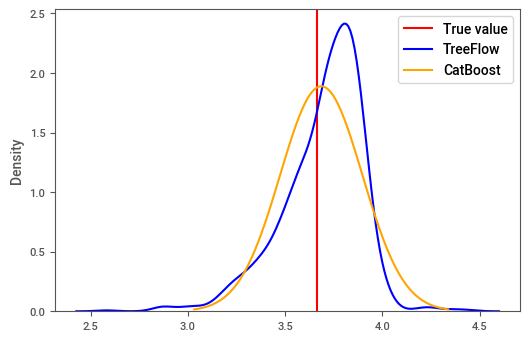

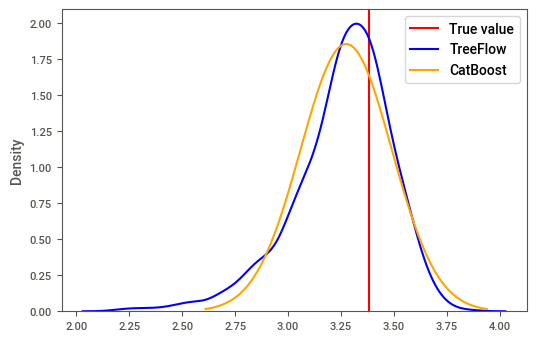

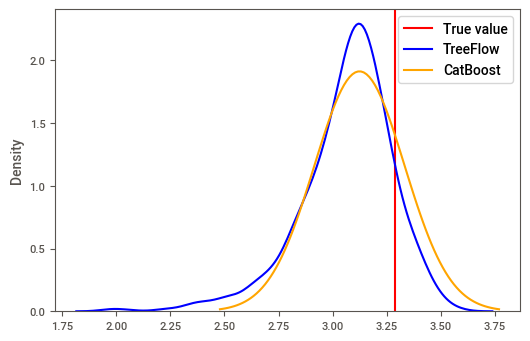

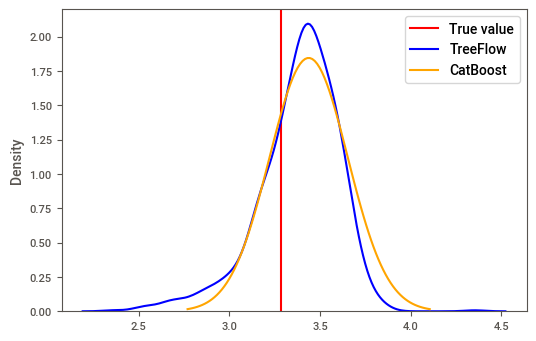

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()